In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition, metrics, pipeline
import pandas as pd
import itables

In [ ]:
""" df = pd.read_csv("data/creditcard.csv")

train_indices = np.random.choice(df.index, size = int(len(df) * 0.85), replace = False)
test_indices = df.index.difference(train_indices)

train = df.loc[train_indices]
test = df.loc[test_indices]                                                  

train.to_csv("data/train.csv", index = False)
test.to_csv("data/test.csv", index = False) """

' df = pd.read_csv("data/creditcard.csv")\n\ntrain_indices = np.random.choice(df.index, size = int(len(df) * 0.85), replace = False)\ntest_indices = df.index.difference(train_indices)\n\ntrain = df.loc[train_indices]\ntest = df.loc[test_indices]\n\ntrain.to_csv("data/train.csv", index = False)\ntest.to_csv("data/test.csv", index = False) '

In [3]:
# Read the train data
df = pd.read_csv("data/train.csv")

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,64978.0,1.147567,-0.247232,0.642300,-0.154126,-0.756582,-0.371580,-0.428201,0.157998,0.268554,...,-0.041939,-0.199492,0.135341,0.247412,-0.053565,0.906059,-0.067666,-0.001259,19.99,0
1,121403.0,-1.472078,-0.499550,-0.571935,-3.348055,2.083377,3.451347,-0.497001,1.573490,0.782681,...,0.326733,0.571447,0.056379,0.759785,-0.092253,0.546324,0.194660,0.056214,102.00,0
2,148836.0,1.925837,-0.253926,-0.395083,1.122672,-0.362961,0.026606,-0.595177,0.130137,0.738764,...,0.247574,0.792639,0.061246,-0.518619,-0.073554,-0.551558,0.047722,-0.043553,18.00,0
3,32437.0,-0.941836,1.436914,1.767752,0.993862,0.991538,0.519547,0.939153,-0.898447,-1.493544,...,0.878103,0.136805,-0.484115,-0.500653,0.739777,0.072977,-0.116133,-0.180600,22.75,0
4,32361.0,1.140750,0.118772,0.687966,1.441250,-0.328428,0.024790,-0.140798,0.049784,0.478602,...,-0.046959,0.161593,-0.079482,0.101073,0.641511,-0.270283,0.058655,0.021115,10.00,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,242085.0,94835.007758,47491.274141,0.000000,54243.000000,84727.000000,139340.000000,172792.000000
V1,242085.0,0.002638,1.958438,-56.407510,-0.918797,0.020464,1.316137,2.454930
V2,242085.0,0.000815,1.643492,-72.715728,-0.597816,0.064979,0.802582,21.467203
V3,242085.0,-0.001544,1.520658,-48.325589,-0.891138,0.180235,1.025291,4.226108
V4,242085.0,0.000670,1.416556,-5.683171,-0.849044,-0.018724,0.745564,16.715537
V5,242085.0,-0.000967,1.387046,-113.743307,-0.691943,-0.055914,0.612152,34.801666
V6,242085.0,0.002078,1.337085,-26.160506,-0.767640,-0.273696,0.400867,73.301626
V7,242085.0,-0.001002,1.247572,-41.506796,-0.554241,0.038475,0.569737,120.589494
V8,242085.0,0.000982,1.200456,-73.216718,-0.208499,0.022384,0.327352,20.007208
V9,242085.0,-0.000252,1.098348,-13.434066,-0.643775,-0.051490,0.598433,10.392889


In [6]:
pd.melt(df)

,variable,value
0,Time,64978.0
1,Time,121403.0
2,Time,148836.0
3,Time,32437.0
4,Time,32361.0
...,...,...
7504630,Class,0.0
7504631,Class,0.0
7504632,Class,0.0
7504633,Class,0.0


In [5]:
df.shape

(242085, 31)

In [ ]:
rec_errors = []
for n_components in range(1, 31):
    pca = pipeline.make_pipeline(
        preprocessing.StandardScaler(), decomposition.PCA(n_components=n_components)
    ).fit(df)
    df_pca = pca.transform(df)
    inv_transformed = pd.DataFrame(pca.inverse_transform(df_pca), columns=df.columns)
    # print(f"n_components: {n_components}, explained_variance_ratio: {pca.explained_variance_ratio_.sum()}")
    print(f"Shape of transformed data: {df_pca.shape}")
    print(f"Shape of inverse transformed data: {inv_transformed.shape}\n")
    reconstruction_error = metrics.mean_squared_error(df, inv_transformed)
    rec_errors.append(reconstruction_error)
# Plot the reconstruction errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), rec_errors, marker="o")
plt.title("Reconstruction Error vs Number of PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.xticks(range(1, 31))
plt.grid()
plt.show()

# print(f"Reconstruction error: {reconstruction_error}")

Shape of transformed data: (242085, 1)
Shape of inverse transformed data: (242085, 31)

Shape of transformed data: (242085, 2)
Shape of inverse transformed data: (242085, 31)

Shape of transformed data: (242085, 3)
Shape of inverse transformed data: (242085, 31)

Shape of transformed data: (242085, 4)
Shape of inverse transformed data: (242085, 31)

Shape of transformed data: (242085, 5)
Shape of inverse transformed data: (242085, 31)

Shape of transformed data: (242085, 6)
Shape of inverse transformed data: (242085, 31)



In [30]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,64978.0,1.147567,-0.247232,0.642300,-0.154126,-0.756582,-0.371580,-0.428201,0.157998,0.268554,...,-0.041939,-0.199492,0.135341,0.247412,-0.053565,0.906059,-0.067666,-0.001259,19.99,0
1,121403.0,-1.472078,-0.499550,-0.571935,-3.348055,2.083377,3.451347,-0.497001,1.573490,0.782681,...,0.326733,0.571447,0.056379,0.759785,-0.092253,0.546324,0.194660,0.056214,102.00,0
2,148836.0,1.925837,-0.253926,-0.395083,1.122672,-0.362961,0.026606,-0.595177,0.130137,0.738764,...,0.247574,0.792639,0.061246,-0.518619,-0.073554,-0.551558,0.047722,-0.043553,18.00,0
3,32437.0,-0.941836,1.436914,1.767752,0.993862,0.991538,0.519547,0.939153,-0.898447,-1.493544,...,0.878103,0.136805,-0.484115,-0.500653,0.739777,0.072977,-0.116133,-0.180600,22.75,0
4,32361.0,1.140750,0.118772,0.687966,1.441250,-0.328428,0.024790,-0.140798,0.049784,0.478602,...,-0.046959,0.161593,-0.079482,0.101073,0.641511,-0.270283,0.058655,0.021115,10.00,0


In [31]:
df_pca[:5, :2]

array([[-2.98570037e+04, -7.00734591e+01],
       [ 2.65679914e+04,  1.52711296e+01],
       [ 5.40009963e+04, -6.71121755e+01],
       [-6.23980038e+04, -6.92367310e+01],
       [-6.24740030e+04, -8.19896528e+01]])

In [32]:
inv_transformed

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,64977.999987,1.244068,0.015202,0.539699,0.091445,-0.097356,0.016575,-0.155905,0.052203,0.016043,...,-0.037317,-0.064685,-0.009083,0.006803,0.088624,0.013570,-0.002619,0.001760,19.991023,-0.001349
1,121403.000015,-1.469413,0.235564,-0.439015,-0.117929,0.223503,-0.084415,0.021498,-0.016335,-0.004218,...,0.017567,0.068157,0.023798,-0.007255,-0.076298,-0.012788,-0.000879,-0.001331,102.000380,0.005705
2,148835.999990,2.016551,-0.092510,-0.570660,-0.160779,0.288305,-0.113406,0.054178,-0.025854,-0.001671,...,0.021189,0.116454,0.043015,-0.011900,-0.124316,-0.021678,-0.006005,-0.004603,18.001023,-0.003294
3,32437.000001,-1.088826,0.432207,0.887773,0.134672,-0.090968,-0.005743,-0.321258,0.099244,0.027909,...,-0.065216,-0.118719,-0.016710,0.012562,0.162083,0.025626,-0.002197,0.004770,22.747433,0.004854
4,32361.000007,1.135934,0.061678,0.992589,0.188488,-0.237486,0.060539,-0.252025,0.086604,0.024608,...,-0.062719,-0.134714,-0.027610,0.014100,0.173246,0.027441,-0.001935,0.004140,10.000953,-0.001068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242080,171436.999975,-0.045182,0.297665,-0.962264,-0.289816,0.566647,-0.229769,0.017038,-0.028147,-0.000855,...,0.031135,0.183440,0.071134,-0.018616,-0.191940,-0.032988,-0.007919,-0.005715,19.601291,0.002265
242081,50738.000004,1.153847,0.019491,0.727799,0.136378,-0.169949,0.042279,-0.186299,0.064215,0.018605,...,-0.046644,-0.096088,-0.018654,0.010029,0.124819,0.019587,-0.001911,0.002836,21.989627,-0.001134
242082,135795.999973,-1.579331,0.553181,-0.543659,-0.213038,0.487416,-0.213374,-0.114838,0.013168,0.008949,...,0.004189,0.115468,0.055524,-0.011517,-0.107174,-0.018972,-0.006780,-0.002676,25.001048,0.006310
242083,151373.000003,1.688371,-0.302475,-0.707878,-0.135632,0.159998,-0.038594,0.197415,-0.063446,-0.015896,...,0.043315,0.111433,0.026930,-0.011912,-0.138652,-0.023080,-0.001402,-0.004406,89.961448,-0.002681


In [33]:
reconstruction_error = metrics.mean_squared_error(df, inv_transformed)
print(f"Reconstruction error: {reconstruction_error}")

Reconstruction error: 0.7933470710131829


In [ ]:
# Original Data with 31 cols -> Encoded state with also 31 columns (sort them by variation) -> Drop n columns -> decode this back to original space

## Supervised and Unsupervised Approaches
#### PCA
1. Fit to training data
2. Transform the test/train data
3. Inverse transform the data
4. Calculate reconstruction error
5. Output the error
6. Tell which column(s) caused the outlier

In [52]:
class AnomalyDetectorPCA:
    def __init__(self, n_components: int = 2, threshold=3):
        self.n_components = n_components
        self.pca = None
        self.threshold = threshold

    def fit(self, X: pd.DataFrame):
        self.data_columns = X.columns
        self.pca = pipeline.make_pipeline(
            preprocessing.StandardScaler(),
            decomposition.PCA(n_components=self.n_components),
        ).fit(X)

    def transform(self, X: pd.DataFrame):
        return self.pca.transform(X)

    def inverse_transform(self, X_transformed):
        return pd.DataFrame(
            self.pca.inverse_transform(X_transformed), columns=self.data_columns
        )

    def predict(self, X: pd.DataFrame):
        X = X.copy()
        # transform  the  existing data
        transformed_data = pd.DataFrame(
            self.transform(X),
            columns=["pc: " + str(i) for i in range(1, self.n_components + 1)],
        )

        # Now, Inverse transform the data
        inverse_transformed = self.inverse_transform(transformed_data)

        # Calculate the reconstruction error
        self.reconstruction_error_explainable = (X - inverse_transformed) ** 2
        reconstruction_error = np.mean(self.reconstruction_error_explainable, axis=1)

        # prepare the return df and reconstruction error dfs
        X["reconstruction_error"] = reconstruction_error
        self.reconstruction_error_explainable["reconstruction_error"] = (
            reconstruction_error
        )

        # Sort the DataFrames by reconstruction error
        X = X.sort_values(by="reconstruction_error", ascending=False)
        self.reconstruction_error_explainable = (
            self.reconstruction_error_explainable.sort_values(
                by="reconstruction_error", ascending=False
            )
        )

        # Create the anomaly column based on the threshold
        # Apply tukey's method to determine the threshold
        q1 = X["reconstruction_error"].quantile(0.25)
        q3 = X["reconstruction_error"].quantile(0.75)
        iqr = q3 - q1
        threshold_value = q3 + self.threshold * iqr

        # Mark anomalies
        X["anomaly"] = X["reconstruction_error"] > threshold_value
        X["Index"] = np.arange(len(X))
        self.reconstruction_error_explainable["Index"] = np.arange(
            len(self.reconstruction_error_explainable)
        )

        return X

    def explain(self, index: int):
        explainer = self.reconstruction_error_explainable.loc[
            self.reconstruction_error_explainable["Index"] == index, :
        ].drop(columns=["reconstruction_error", "Index"])
        print(explainer)
        plt.figure(figsize=(25, 6))
        plt.bar(x=explainer.columns, height=explainer.values.flatten(), color="black")
        # plt.set_xticklabels(explainer.columns, rotation=90)
        return plt


# Example usage
X = df.drop(columns=["Time", "Class"])
detector = AnomalyDetectorPCA(n_components=2)
detector.fit(X)
predictions = detector.predict(X)


# Display the top 5 anomalies based on reconstruction error
print(predictions.head())
print(predictions.tail())

               V1         V2         V3         V4         V5        V6  \
55564  -40.042537 -38.430842 -21.277176  10.527243 -16.296090  8.799515   
98653  -37.054295 -35.699829 -19.880878   9.552849 -16.701866  9.741883   
111365 -35.557253 -36.625429 -17.338365   9.628875  -6.817372  3.759660   
191398 -40.470142 -37.520432 -17.474421  11.427809  -4.336937  0.456246   
168945 -46.855047 -45.607973 -18.320903  13.129143   0.775717 -2.695834   

               V7        V8        V9       V10  ...        V23       V24  \
55564   19.553200 -6.221785  6.121324  2.881454  ... -20.034848  1.575385   
98653   21.014587 -6.414390  5.751017  2.598367  ... -14.414207  1.223594   
111365  13.525079 -6.099335  4.727746  2.855754  ... -17.215815  1.299216   
191398   2.113722 -6.395106  4.252881  0.794049  ... -20.757358  0.810500   
168945   1.087461 -4.241002  6.645063  3.817710  ... -27.533643  2.023816   

             V25       V26       V27        V28   Amount  \
55564  -4.196468 -0.851794

In [53]:
itables.show(
    predictions, max_rows=50, max_columns=100, show_index=True, show_dimensions=True
)

Loading ITables v2.4.0 from the internet... (need help?)


            V1        V2       V3        V4        V5        V6        V7  \
63465  4.34246  2.882289  1.54801  3.095293  1.245174  0.149981  2.023727   

            V8        V9       V10  ...       V20       V21       V22  \
63465  0.01909  1.378967  2.629278  ...  0.117561  0.011269  0.001228   

            V23       V24       V25       V26       V27       V28     Amount  
63465  0.028014  0.025085  0.057871  0.030135  0.000824  0.003112  52.545721  

[1 rows x 29 columns]


<module 'matplotlib.pyplot' from '/home/nitish/Documents/github/AnomalyDetectionPCA/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

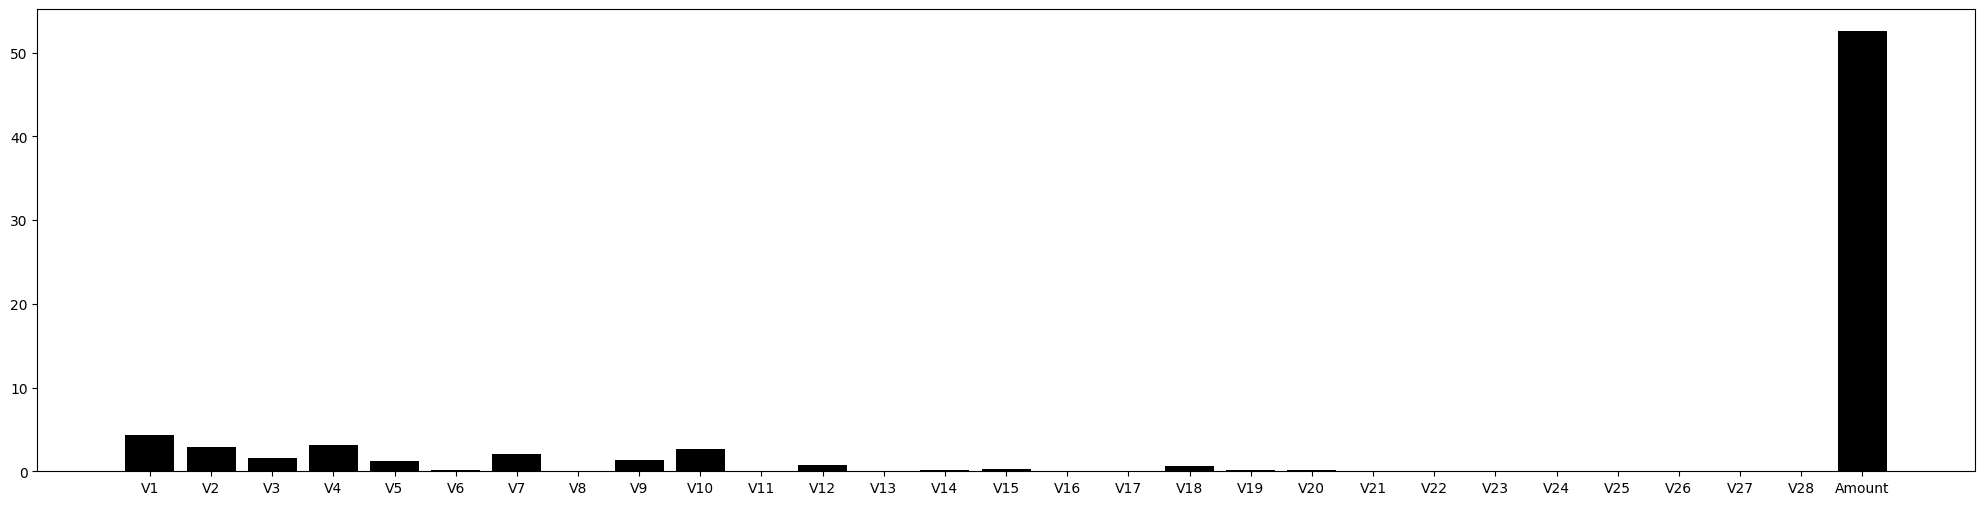

In [60]:
detector.explain(100000)

In [55]:
plt.bar?

Signature:
plt.bar(
    x: 'float | ArrayLike',
    height: 'float | ArrayLike',
    width: 'float | ArrayLike' = 0.8,
    bottom: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

    Bars are often used for categorical data, i.e. string labels below
    the bars. You can provide a list of strings directly to *x*.
    ``bar(['A', 'B', 'C'], [1, 2, 3])`` is often a shorter and more
    convenient notation compared to
    ``bar(range(3), [1, 2, 3], ti